In [1]:
__imp

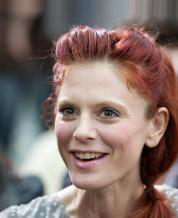

In [2]:
from PIL import Image
import numpy as np

img_ = Image.open('/sdh/data/celebA/all_imgs/000002.jpg')
img_

In [145]:
import imgaug as ia
from imgaug import augmenters as iaa


sometimes = lambda aug: iaa.Sometimes(0.4, aug)
often = lambda aug: iaa.Sometimes(0.8, aug)

# seq = iaa.Sequential([
    
#     iaa.Fliplr(0.5),  # horizontally flip 50% of the images
#     often(iaa.Affine(
#         # scale images to 80-120% of their size, individually per axis
#         scale={"x": (0.95, 1.05), "y": (0.95, 1.05)},
#         # translate by -20 to +20 percent (per axis)
#         translate_percent={"x": (-0.05, 0.05), "y": (-0.05, 0.05)},
#         rotate=(-8, 8),  # rotate by -45 to +45 degrees
#         shear=(-5, 5),  # shear by -16 to +16 degrees
#         order=[3],  # use nearest neighbour or bilinear interpolation (fast)
#         cval=(0),  # if mode is constant, use a cval between 0 and 255
#         # use any of scikit-image's warping modes (see 2nd image from the top for examples)
#         mode='constant', 
#     )),
#     sometimes(iaa.Add((-8, 8))), # change brightness of images (by -10 to 10 of original value)
#     sometimes(iaa.AddToHueAndSaturation((-8, 8))), # change hue and saturation
#     sometimes(iaa.PiecewiseAffine(scale=(0.00, 0.02), order=3)),
#     sometimes(iaa.ContrastNormalization((0.5, 1.5))),
#     often(iaa.GaussianBlur(sigma=(0, 0.3))),  # blur images with a sigma of 0 to 3.0
# #     (iaa.ElasticTransformation(alpha=(0.0, 1.5), sigma=(9.0, 10))),
    
# ])


seq = iaa.Sequential([
    
    iaa.Fliplr(0.5),  # horizontally flip 50% of the images
    often(iaa.CropAndPad(
            percent=(-0.05, 0.05),
            pad_mode=ia.ALL,
            pad_cval=(0, 255)
        )),
    often(iaa.Affine(
            scale={"x": (0.85, 1.15), "y": (0.85, 1.15)}, # scale images to 80-120% of their size, individually per axis
            translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)}, # translate by -20 to +20 percent (per axis)
            rotate=(-25, 25), # rotate by -45 to +45 degrees
            shear=(-12, 12), # shear by -16 to +16 degrees
            order=[0, 1, 3], # use nearest neighbour or bilinear interpolation (fast)
            cval=(0, 255), # if mode is constant, use a cval between 0 and 255
            mode=ia.ALL, # use any of scikit-image's warping modes (see 2nd image from the top for examples)
            backend='cv2'
        )),
    sometimes(iaa.Add((-10, 10))), # change brightness of images (by -10 to 10 of original value)
    sometimes(iaa.AddToHueAndSaturation((-10, 8))), # change hue and saturation
#         (iaa.PiecewiseAffine(scale=(0.00, 0.02), order=3)),
    sometimes(iaa.ContrastNormalization((0.5, 1.5))),
    sometimes(iaa.GaussianBlur(sigma=(0, 0.7))),  # blur images with a sigma of 0 to 3.0
#         (iaa.ElasticTransformation(alpha=(0.0, 1.5), sigma=(9.0, 10))),
])


In [4]:
seq = iaa.Sequential(
    [
        # apply the following augmenters to most images
        iaa.Fliplr(0.5), # horizontally flip 50% of all images
        iaa.Flipud(0.2), # vertically flip 20% of all images
        # crop images by -5% to 10% of their height/width
        sometimes(iaa.CropAndPad(
            percent=(-0.05, 0.1),
            pad_mode=ia.ALL,
            pad_cval=(0, 255)
        )),
        sometimes(iaa.Affine(
            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale images to 80-120% of their size, individually per axis
            translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}, # translate by -20 to +20 percent (per axis)
            rotate=(-45, 45), # rotate by -45 to +45 degrees
            shear=(-16, 16), # shear by -16 to +16 degrees
            order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
            cval=(0, 255), # if mode is constant, use a cval between 0 and 255
            mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
        )),
        # execute 0 to 5 of the following (less important) augmenters per image
        # don't execute all of them, as that would often be way too strong
#         iaa.SomeOf((0, 5),
#             [
                sometimes(iaa.Superpixels(p_replace=(0, 1.0), n_segments=(20, 200))), # convert images into their superpixel representation
                iaa.OneOf([
                    iaa.GaussianBlur((0, 3.0)), # blur images with a sigma between 0 and 3.0
                    iaa.AverageBlur(k=(2, 7)), # blur image using local means with kernel sizes between 2 and 7
                    iaa.MedianBlur(k=(3, 11)), # blur image using local medians with kernel sizes between 2 and 7
                ]),
                iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
                iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)), # emboss images
                # search either for all edges or for directed edges,
                # blend the result with the original image using a blobby mask
                iaa.SimplexNoiseAlpha(iaa.OneOf([
                    iaa.EdgeDetect(alpha=(0.5, 1.0)),
                    iaa.DirectedEdgeDetect(alpha=(0.5, 1.0), direction=(0.0, 1.0)),
                ])),
                iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5), # add gaussian noise to images
                iaa.OneOf([
                    iaa.Dropout((0.01, 0.1), per_channel=0.5), # randomly remove up to 10% of the pixels
                    iaa.CoarseDropout((0.03, 0.15), size_percent=(0.02, 0.05), per_channel=0.2),
                ]),
                iaa.Invert(0.05, per_channel=True), # invert color channels
                iaa.Add((-10, 10), per_channel=0.5), # change brightness of images (by -10 to 10 of original value)
                iaa.AddToHueAndSaturation((-20, 20)), # change hue and saturation
                # either change the brightness of the whole image (sometimes
                # per channel) or change the brightness of subareas
                iaa.OneOf([
                    iaa.Multiply((0.5, 1.5), per_channel=0.5),
                    iaa.FrequencyNoiseAlpha(
                        exponent=(-4, 0),
                        first=iaa.Multiply((0.5, 1.5), per_channel=True),
                        second=iaa.ContrastNormalization((0.5, 2.0))
                    )
                ]),
                iaa.ContrastNormalization((0.5, 2.0), per_channel=0.5), # improve or worsen the contrast
                iaa.Grayscale(alpha=(0.0, 1.0)),
                (iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)), # move pixels locally around (with random strengths)
                (iaa.PiecewiseAffine(scale=(0.01, 0.05))), # sometimes move parts of the image around
                (iaa.PerspectiveTransform(scale=(0.01, 0.1)))
#             ],
#             random_order=True
#         )
    ],
    random_order=True
)


In [387]:
nn.Conv2d??

In [386]:
import torch.nn as nn

In [26]:
import imgaug
from imgaug.augmenters import Augmenter

In [ ]:
def func_images(images, random_state, parents, hooks, **kwargs):
    
    random
    blur_size = int(4 * sigma) | 1
    q = random_state.rand(*shape[:2]) * 2 - 1
    dx = alpha * cv2.GaussianBlur(q, ksize=(blur_size, blur_size), sigmaX=sigma)  # .reshape(shape[0], shape[1], 1)

    
    if kwargs['shared_crop']:
        assert len(set([x.shape[0] for x in images])) == 1
        assert len(set([x.shape[1] for x in images])) == 1
        
        x, y = get_crop_xy(images[0], kwargs['crop_size'], random_state)        
    
    out = []
    for img in images:
        
        if not kwargs['shared_crop']:
            x, y = get_crop_xy(img, kwargs['crop_size'], random_state)
    
        out.append(img[y: y + kwargs['crop_size'], x: x + kwargs['crop_size']])

    return out


def func_keypoints(keypoints_on_images, random_state, parents, hooks):
    print('Not implemented')
    return keypoints_on_images

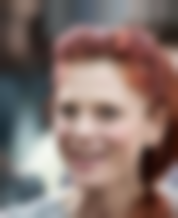

In [228]:
class GaussianBlurCV2(iaa.GaussianBlur): # pylint: disable=locally-disabled, unused-variable, line-too-long

    def _augment_images(self, images, random_state, parents, hooks):
        result = images
        nb_images = len(images)
        samples = self.sigma.draw_samples((nb_images,), random_state=random_state)
        for i in range(nb_images):
            nb_channels = images[i].shape[2]
            sig = samples[i]
            if sig > 0 + self.eps:
                kernel_size = int(4 * sig) | 1
                kernel = cv2.getGaussianKernel(kernel_size, sig, cv2.CV_32F)
                result[i] = cv2.sepFilter2D(images[i], -1, kernel, kernel)

        return result

    def _augment_keypoints(self, keypoints_on_images, random_state, parents, hooks):
        return keypoints_on_images
    
seq = iaa.Sequential([
    GaussianBlurCV2(sigma=5),   
])


Image.fromarray(seq.augment_image(np.array(img_)))

CPU times: user 3.78 ms, sys: 0 ns, total: 3.78 ms
Wall time: 3.36 ms


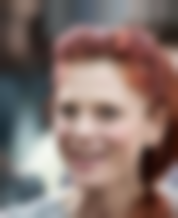

In [231]:
%time  Image.fromarray(seq.augment_image(np.array(img_)))

In [349]:
def elastic_transform(images, random_state, parents, hooks, alpha, sigma, alpha_affine):
    '''
        n01z3
    '''
    
    print (sigma)
    out = []
    for image in images:
#         if random_state is None:
#             random_state = np.random.RandomState(None)

        shape = image.shape
        shape_size = shape[:2]

        # Random affine
#         center_square = np.float32(shape_size) // 2
#         square_size = min(shape_size) // 3
#         pts1 = np.float32([center_square + square_size, [center_square[0] + square_size, center_square[1] - square_size],
#                            center_square - square_size])
#         pts2 = pts1 + random_state.uniform(-alpha_affine, alpha_affine, size=pts1.shape).astype(np.float32)
#         M = cv2.getAffineTransform(pts1, pts2)
#         image = cv2.warpAffine(image, M, shape_size[::-1], borderMode=cv2.BORDER_REFLECT_101)

        blur_size = int(4 * sigma) | 1
        q = random_state.rand(*shape[:2]) * 2 - 1
        print(q[0])
        dx = alpha * cv2.GaussianBlur(q, ksize=(blur_size, blur_size), sigmaX=sigma)  # .reshape(shape[0], shape[1], 1)

        q = random_state.rand(*shape[:2]) * 2 - 1
        dy = alpha * cv2.GaussianBlur(q, ksize=(blur_size, blur_size), sigmaX=sigma)  # .reshape(shape[0], shape[1], 1)

        x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
        out.append(cv2.remap(image, (x + dx).astype(np.float32), (y + dy).astype(np.float32),
                         interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101))
    
    return out

In [383]:
import glob
img_dirs = ['/sdg/rawr/auto/jpg', '/sdg/rawr/as-shot/jpg']
# dfs = []

def fname(x):
    return '.'.join(os.path.basename(x).split('.')[:-1])

dfs = []
names = None
for i, img_dir in enumerate(img_dirs):
    img_paths = glob.glob(f'{img_dir}/f*')

    df = pd.DataFrame(img_paths, columns=[f'img{i}_path'])
    df['name'] = df[f'img{i}_path'].apply(fname)

    dfs.append(df)        

    
d = dfs[0]

for df in dfs[1:]:
    d = d.join(df.set_index('name'), how='inner', on='name')

In [384]:
d

,img0_path,name,img1_path
0,/sdg/rawr/auto/jpg/f145365ba0b42f7569f48a4724c...,f145365ba0b42f7569f48a4724c6bb7d,/sdg/rawr/as-shot/jpg/f145365ba0b42f7569f48a47...
1,/sdg/rawr/auto/jpg/f03868f505cc3843ee18faec825...,f03868f505cc3843ee18faec8251d8f0,/sdg/rawr/as-shot/jpg/f03868f505cc3843ee18faec...
2,/sdg/rawr/auto/jpg/f54d68e89811d77b427a5ba6369...,f54d68e89811d77b427a5ba63691adeb,/sdg/rawr/as-shot/jpg/f54d68e89811d77b427a5ba6...
3,/sdg/rawr/auto/jpg/ffb5849e25b079ecc4cb68de506...,ffb5849e25b079ecc4cb68de506673b9,/sdg/rawr/as-shot/jpg/ffb5849e25b079ecc4cb68de...
4,/sdg/rawr/auto/jpg/f3bfdb52960333da16314816dfc...,f3bfdb52960333da16314816dfcb250f,/sdg/rawr/as-shot/jpg/f3bfdb52960333da16314816...
5,/sdg/rawr/auto/jpg/ffaff2275f83f2f29c19e1cd2b6...,ffaff2275f83f2f29c19e1cd2b6a37f5,/sdg/rawr/as-shot/jpg/ffaff2275f83f2f29c19e1cd...
6,/sdg/rawr/auto/jpg/f9164b99bb0dcf8c91d4b029410...,f9164b99bb0dcf8c91d4b029410a5bd5,/sdg/rawr/as-shot/jpg/f9164b99bb0dcf8c91d4b029...
7,/sdg/rawr/auto/jpg/f286a25819c5c36ec0fceaf9751...,f286a25819c5c36ec0fceaf9751353e2,/sdg/rawr/as-shot/jpg/f286a25819c5c36ec0fceaf9...
8,/sdg/rawr/auto/jpg/f8783aba15ea13573d465359469...,f8783aba15ea13573d465359469af7bc,/sdg/rawr/as-shot/jpg/f8783aba15ea13573d465359...
9,/sdg/rawr/auto/jpg/f0741110581981dfbe82c4d716d...,f0741110581981dfbe82c4d716dbfd19,/sdg/rawr/as-shot/jpg/f0741110581981dfbe82c4d7...


In [377]:
dfs[1]

,img1_path,names
0,/sdg/rawr/as-shot/jpg/f145365ba0b42f7569f48a47...,f145365ba0b42f7569f48a4724c6bb7d
1,/sdg/rawr/as-shot/jpg/f03868f505cc3843ee18faec...,f03868f505cc3843ee18faec8251d8f0
2,/sdg/rawr/as-shot/jpg/f54d68e89811d77b427a5ba6...,f54d68e89811d77b427a5ba63691adeb
3,/sdg/rawr/as-shot/jpg/ffb5849e25b079ecc4cb68de...,ffb5849e25b079ecc4cb68de506673b9
4,/sdg/rawr/as-shot/jpg/f3bfdb52960333da16314816...,f3bfdb52960333da16314816dfcb250f
5,/sdg/rawr/as-shot/jpg/ffaff2275f83f2f29c19e1cd...,ffaff2275f83f2f29c19e1cd2b6a37f5
6,/sdg/rawr/as-shot/jpg/f9164b99bb0dcf8c91d4b029...,f9164b99bb0dcf8c91d4b029410a5bd5
7,/sdg/rawr/as-shot/jpg/f286a25819c5c36ec0fceaf9...,f286a25819c5c36ec0fceaf9751353e2
8,/sdg/rawr/as-shot/jpg/f8783aba15ea13573d465359...,f8783aba15ea13573d465359469af7bc
9,/sdg/rawr/as-shot/jpg/f0741110581981dfbe82c4d7...,f0741110581981dfbe82c4d716dbfd19


In [373]:
d.set_index('names')

,img1_path
names,
f145365ba0b42f7569f48a4724c6bb7d,/sdg/rawr/as-shot/jpg/f145365ba0b42f7569f48a47...
f03868f505cc3843ee18faec8251d8f0,/sdg/rawr/as-shot/jpg/f03868f505cc3843ee18faec...
f54d68e89811d77b427a5ba63691adeb,/sdg/rawr/as-shot/jpg/f54d68e89811d77b427a5ba6...
ffb5849e25b079ecc4cb68de506673b9,/sdg/rawr/as-shot/jpg/ffb5849e25b079ecc4cb68de...
f3bfdb52960333da16314816dfcb250f,/sdg/rawr/as-shot/jpg/f3bfdb52960333da16314816...
ffaff2275f83f2f29c19e1cd2b6a37f5,/sdg/rawr/as-shot/jpg/ffaff2275f83f2f29c19e1cd...
f9164b99bb0dcf8c91d4b029410a5bd5,/sdg/rawr/as-shot/jpg/f9164b99bb0dcf8c91d4b029...
f286a25819c5c36ec0fceaf9751353e2,/sdg/rawr/as-shot/jpg/f286a25819c5c36ec0fceaf9...
f8783aba15ea13573d465359469af7bc,/sdg/rawr/as-shot/jpg/f8783aba15ea13573d465359...


In [357]:
__imp

2
[-0.21577866 -0.86049303 -0.59571479  0.58800748  0.7918614  -0.43435638
 -0.61927812 -0.94655099  0.89539478  0.36770985  0.91406021  0.72769837
 -0.31906681 -0.77463391 -0.00188641 -0.9463724  -0.70016674 -0.53313474
  0.33129319  0.01975495 -0.39516089  0.1295368  -0.7495947   0.51141625
  0.42407028 -0.56699465  0.21278311  0.00660521 -0.87836738 -0.44369217
  0.99896541 -0.80092868  0.01282261  0.69866751 -0.39869625 -0.47858272
  0.7815861  -0.39034011  0.30298662  0.48062597  0.5772355   0.98951927
  0.60638414  0.31402431  0.79092712  0.81148927  0.94633292  0.55293053
 -0.61014534  0.41961218 -0.84974312 -0.36407414 -0.76838498  0.89988521
 -0.32249178  0.42643129  0.14263687 -0.78497717  0.1226889   0.32204709
  0.76303451 -0.85982872 -0.40873203  0.38468189 -0.93133673 -0.59289309
 -0.56265921  0.33865283 -0.42807864  0.19919132  0.93069689  0.58648596
 -0.33419439 -0.05520006 -0.5986522  -0.96855998 -0.4205692  -0.26118278
  0.12873435  0.8881333   0.89570415 -0.8598034  

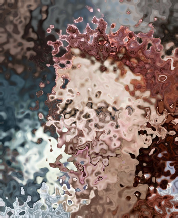

In [354]:
def crop_keypoints(keypoints_on_images, random_state, parents, hooks):
    print('Not implemented')
    return keypoints_on_images

et  = LambdaKW(
                    func_images=elastic_transform,
                    func_keypoints=crop_keypoints,
                    alpha=100,
                    sigma=2,
                    alpha_affine=5,
    )

Image.fromarray(et.augment_image(np.array(img_)))

In [186]:
import cv2

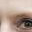

In [177]:
Image.fromarray(seq.augment_image(np.array(img_)))

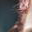

In [178]:
seq = seq.to_deterministic()
qq = seq.augment_images([np.array(img_), np.array(img_)])

Image.fromarray(qq[0])

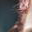

In [179]:
Image.fromarray(qq[1])

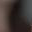

In [184]:
# seq = seq.to_deterministic()
qq = seq.augment_images([np.array(img_), np.array(img_)])

Image.fromarray(qq[0])


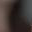

In [185]:
Image.fromarray(qq[1])

In [105]:
img__ = np.array(img_)
seq.augment_image(img__);

In [212]:
%timeit seq.augment_image(img__)

563 µs ± 9.18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [220]:
%timeit seq.augment_image(img__)

5.46 ms ± 82.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
b
